In [190]:
# impoting the libraries
from sklearn import svm, cross_validation, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.cross_validation import train_test_split
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas_datareader.data as web
import datetime as dt
import sklearn
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import bs4 as bs
import urllib.request as urlb
import pickle
import requests
import os
import time
#import mpld3
%matplotlib notebook

#mpld3.enable_notebook()
style.use('ggplot')

In [191]:
# asigning the start date and end date 
start = dt.datetime(1985, 1, 1) # collect from this date
end = dt.datetime.today() #to this date.
stock  = 'AAPL' #using Apple's stock data
df = web.DataReader(stock,'yahoo',start,end) #fetches the data from Yahoo and stores it in data.

In [192]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1985-01-02,0.520089,0.497768,0.520089,0.497768,43825600.0,0.022481
1985-01-03,0.520089,0.506696,0.506696,0.506696,41652800.0,0.022884
1985-01-04,0.508929,0.500000,0.506696,0.506696,34316800.0,0.022884
1985-01-07,0.508929,0.504464,0.506696,0.504464,42728000.0,0.022783
1985-01-08,0.508929,0.500000,0.504464,0.500000,35280000.0,0.022581


In [193]:
df = df.rename(columns = {'Adj Close':'adj_close'})

In [194]:
df.head()

,High,Low,Open,Close,Volume,adj_close
Date,,,,,,
1985-01-02,0.520089,0.497768,0.520089,0.497768,43825600.0,0.022481
1985-01-03,0.520089,0.506696,0.506696,0.506696,41652800.0,0.022884
1985-01-04,0.508929,0.500000,0.506696,0.506696,34316800.0,0.022884
1985-01-07,0.508929,0.504464,0.506696,0.504464,42728000.0,0.022783
1985-01-08,0.508929,0.500000,0.504464,0.500000,35280000.0,0.022581


In [195]:
df.to_csv('AAPL.csv')

In [196]:
data = pd.read_csv('AAPL.csv', parse_dates=True, index_col=0)

In [197]:
data.head()

,High,Low,Open,Close,Volume,adj_close
Date,,,,,,
1985-01-02,0.520089,0.497768,0.520089,0.497768,43825600.0,0.022481
1985-01-03,0.520089,0.506696,0.506696,0.506696,41652800.0,0.022884
1985-01-04,0.508929,0.500000,0.506696,0.506696,34316800.0,0.022884
1985-01-07,0.508929,0.504464,0.506696,0.504464,42728000.0,0.022783
1985-01-08,0.508929,0.500000,0.504464,0.500000,35280000.0,0.022581


<IPython.core.display.Javascript object>


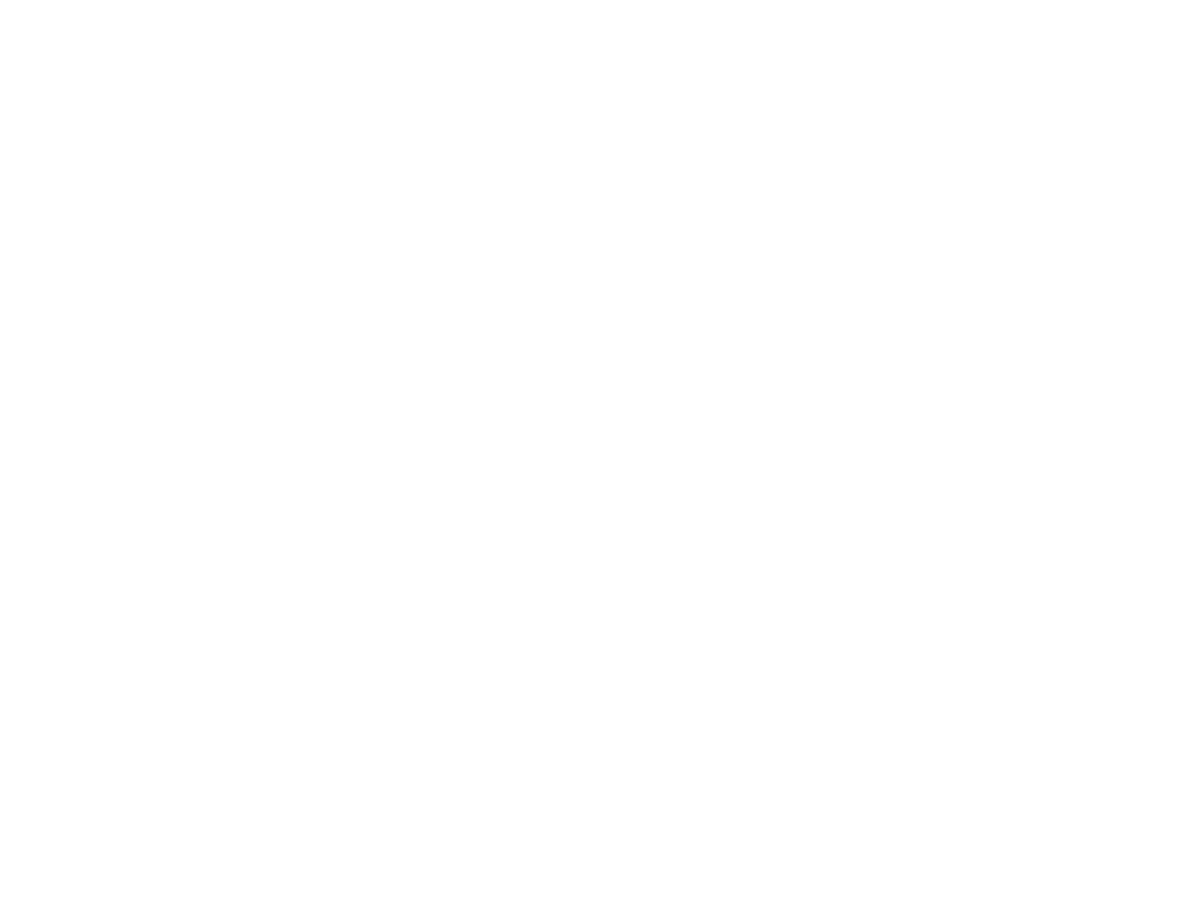

Text(0.5,1,'Stock Prices')

In [198]:
%matplotlib notebook
data[['adj_close','High','Low','Open','Close']].plot()
plt.title("Stock Prices")

# Rolling average method.

In [199]:
#creating a new column to add rolling average

#data['100ma'] = data['adj_close'].rolling(window=100).mean()

In [200]:
#data.tail()

In [201]:
#THe first 100 rows cant have the calculation.
#data.head()

In [202]:
#data.dropna(inplace=True)

In [203]:
#the first 100 rows will be deleted due to dropna
#data.head()

In [204]:
#data.tail()

In [205]:
# %matplotlib notebook

# #visualiziation
# ax1 = plt.subplot2grid((6,1), (0,0),rowspan=5,colspan=1)
# ax2 = plt.subplot2grid((6,1), (5,0),rowspan=1,colspan=1, sharex=ax1)

# ax1.plot(data.index,data['adj_close'])
# ax1.plot(data.index,data['100ma'])
# ax2.bar(data.index,data['Volume'])

# plt.show();

# Resampling the data.

In [206]:
data_ohlc=data['adj_close'].resample('10D').ohlc()#creates open high low close
data_volume= data['Volume'].resample('10D').sum()
data_ohlc.head()

,open,high,low,close
Date,,,,
1985-01-02,0.022481,0.024194,0.022481,0.023993
1985-01-12,0.024699,0.024699,0.022682,0.023590
1985-01-22,0.024295,0.024396,0.023388,0.023388
1985-02-01,0.023086,0.024194,0.023086,0.024094
1985-02-11,0.024598,0.024598,0.021271,0.021271


In [207]:
data_ohlc.reset_index(inplace=True)

In [208]:
#candlestick_ohlc requires mdates and ohlc.
data_ohlc['Date'] = data_ohlc['Date'].map(mdates.date2num)


In [209]:
data_ohlc.head()

,Date,open,high,low,close
0,724643.0,0.022481,0.024194,0.022481,0.023993
1,724653.0,0.024699,0.024699,0.022682,0.023590
2,724663.0,0.024295,0.024396,0.023388,0.023388
3,724673.0,0.023086,0.024194,0.023086,0.024094
4,724683.0,0.024598,0.024598,0.021271,0.021271


In [210]:
%matplotlib notebook

#visualiziation
ax1 = plt.subplot2grid((6,1), (0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0),rowspan=1,colspan=1, sharex=ax1)

ax1.xaxis_date()#this is to display actual dates in graph

candlestick_ohlc(ax1,data_ohlc.values,width=5,colorup='g')
ax2.fill_between(data_volume.index.map(mdates.date2num),data_volume.values,0)

plt.show();

<IPython.core.display.Javascript object>

## Using beautiful Soup to fetch S&P 500 companies from wikipedia.
- import beautifulsoup4 library
- use pickle to serialize any python object, this is used to save the S&P 500 list so as to avoid going back to wikipedia everytime it is needed.
- fetch the data

In [215]:
def sp500():
    res = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(res.text,'lxml')
    table = soup.find('table',{'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text #we need the first column which contains the tickers
        tickers.append(ticker)
    with open('sp500tickers.pickle',"wb")as f:
        pickle.dump(tickers,f)#dumping tickers to file 'f'
        print(tickers)
    return tickers
sp500()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CSX

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS'

    Gettitng the data of all the companies we just fetched from wikipedia
    - pull stock pricing data on all of the comapnies acquired
    - if we chose to reload the data, the program will pull the stock information from wikipedia again. But we will be storing the data as a pickle object, and will be storing the data on our local system as the data will be fetched frequently, this makes it more efficient.
    - Using the datetime function for pandas to specify dates for pandas.
    - os is used to creaete, edit and delete files on the system.'
    - Since I am unable to use the yahoo finance or google api to fetch historical data, I am using robinhood, it return the data from last year till today.

In summary we are parsing the data once from the website and storing it locally. Time being another factor, as it takes quite some time to fetch the data again from the internet, storing the data locally provides faster data access.

In [216]:
'''If reload is true then the fuction will reload the tickers from wikipedia
else it will fetch the list of tickers from the pickle object '''

def get_data(reload = False):
    if reload:
        tickers = sp500()
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)
    #create a folder to save the csv files using OS
    if not os.path.exists('stock_dfs'):
            os.mkdir('stock_dfs')
    #fetching the historical stock price.    
    start = dt.datetime(2010,1,1)
    end = dt.datetime.now()
    #iterating over the tickers to fectch the data for those in the list
    for ticker in tickers:
        try:
            print(ticker)
            #is the csv file doesnt exist in the folder create one else acknowledge its existance
            if not os.path.exists('stock_dfs\{}.csv'.format(ticker)):
                df = web.DataReader(ticker,'yahoo',start,end)
                df.reset_index(inplace=True)
                df.set_index("Date",inplace=True)
                df.to_csv('stock_dfs\{}.csv'.format(ticker))
            else:
                print("Alerady have {}".format(ticker))
        except KeyError:
            pass
            
get_data()          

MMM
Alerady have MMM
ABT
Alerady have ABT
ABBV
Alerady have ABBV
ABMD
Alerady have ABMD
ACN
Alerady have ACN
ATVI
Alerady have ATVI
ADBE
Alerady have ADBE
AMD
Alerady have AMD
AAP
Alerady have AAP
AES
Alerady have AES
AET
Alerady have AET
AMG
Alerady have AMG
AFL
Alerady have AFL
A
Alerady have A
APD
Alerady have APD
AKAM
Alerady have AKAM
ALK
Alerady have ALK
ALB
Alerady have ALB
ARE
Alerady have ARE
ALXN
Alerady have ALXN
ALGN
Alerady have ALGN
ALLE
Alerady have ALLE
AGN
Alerady have AGN
ADS
Alerady have ADS
LNT
Alerady have LNT
ALL
Alerady have ALL
GOOGL
Alerady have GOOGL
GOOG
Alerady have GOOG
MO
Alerady have MO
AMZN
Alerady have AMZN
AEE
Alerady have AEE
AAL
Alerady have AAL
AEP
Alerady have AEP
AXP
Alerady have AXP
AIG
Alerady have AIG
AMT
Alerady have AMT
AWK
Alerady have AWK
AMP
Alerady have AMP
ABC
Alerady have ABC
AME
Alerady have AME
AMGN
Alerady have AMGN
APH
Alerady have APH
APC
Alerady have APC
ADI
Alerady have ADI
ANSS
Alerady have ANSS
ANTM
Alerady have ANTM
AON
Alerad

XYL
YUM
ZBH
ZION
ZTS


Further we combine all the dataset into one dataframe

In [223]:
def compile_data():
    with open("sp500tickers.pickle","rb") as f:
        tickers = pickle.load(f)
    
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)

    #         df['{}_HL_pct_diff'.format(ticker)] = (df['High'] - df['Low']) / df['Low']
    #         df['{}_daily_pct_chng'.format(ticker)] = (df['Close'] - df['Open']) / df['Open']

            df.rename(columns = {'Adj Close':ticker},inplace=True)
            df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df,how='outer')
            main_df.to_csv('sp500_combo_adjc.csv')

            if count % 10==0:
                print(count)
        except FileNotFoundError:
            pass
    
compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500


##### What is a correlation?<br>
A correlation is a statistical test of association between variables that is measured on a -1 to 1 scale. The closer the correlation value is to -1 or 1 the stronger the association, the closer to 0, the weaker the association. It measures how change in one variable is associated with change in another variable.
<br>
There are a few common types of tests to measure the level of correlation, Pearson, Spearman, and Kendall. Each have their own assumptions about the data that needs to be meet in order for the test to be able to accurately measure the level of correlation. These are discussed further in the post. Each type of correlation test is testing the following hypothesis.

Source: https://pythonfordatascience.org/correlation-python/

Finding correlations in the dataframe.
- there are a lot of missing values  
- attempting to look for some relationships in the dataset
- data are more than 17 years old
- the companies might have changed over the course of this period

**Perfect negative correlation** **(-1)** exists when the two securities move in opposite directions (i.e., stock A moves up and stock B moves down).<br>
**Perfect positive correlation** **(+1)** exists if the two securities move in perfect unison (i.e., stock A and stock B move up and down at the same time).<br>
**No correlation** **(0)** exists if the price movements are completely random (stock A and stock B go up and down randomly). (For more, see: What Does it Mean if the Correlation Coefficient is Positive, Negative or Zero?)

Source:https://www.investopedia.com/university/guide-pairs-trading/pairs-trading-correlation.asp

In [ ]:
def visuals():
    df = pd.read_csv("sp500_combo_adjc.csv")
#     df['AAPL'].plot()
#     plt.show()
    df_corr = df.corr()
    df_corr.to_csv('sp500corr.csv')
    # fetching just the values
    data1 = df_corr.values
    #creating a figure
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    #defining color for the heatmap
    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)
    #creating ticks
    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    #inverting the graph for more readability
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    #naming the ticks
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    plt.savefig('correlation.png',dpi=(600))
    plt.show()
    

Data preprocessing for Machine Learning:
- Build a model that will predict the price for tomorrow by considering the price change today.
- Create feature set and Labels(target) to feed machine learning model.
- Feature will be the price change for all the companies that day. Target will be 'Buy','Sell','Hold'
- The idea is to train our model to predict the percentage change,ba to buy a particular comapany's share in case of 2% rise in the percentage in the next 7 days, else if the percentage change drops below 2% then sell the stock, if no significant change is observed then hold the stock


Creating labels

In [224]:
def process_label(ticker):
    days = 7
    df = pd.read_csv('sp500_combo_adjc.csv',index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1,days+1):
        df['{}_{}d'.format(ticker,i)] = ((df[ticker].shift(-i) - df[ticker]) / df[ticker])
        
    df.fillna(0,inplace=True)
    return tickers,df

- The function above takes only one parameter'ticker'eg:'XOM'<br>
- 'days = 7' variable determine how many days into the future should the model predict data for <br>
- There are null values in the dataset, we fill the null values with 0 by browsing through the dataset.
- Next we generate percentage change for 7 days into the future.


In [225]:
process_label('AAPL')

(['MMM',
  'ABT',
  'ABBV',
  'ABMD',
  'ACN',
  'ATVI',
  'ADBE',
  'AMD',
  'AAP',
  'AES',
  'AET',
  'AMG',
  'AFL',
  'A',
  'APD',
  'AKAM',
  'ALK',
  'ALB',
  'ARE',
  'ALXN',
  'ALGN',
  'ALLE',
  'AGN',
  'ADS',
  'LNT',
  'ALL',
  'GOOGL',
  'GOOG',
  'MO',
  'AMZN',
  'AEE',
  'AAL',
  'AEP',
  'AXP',
  'AIG',
  'AMT',
  'AWK',
  'AMP',
  'ABC',
  'AME',
  'AMGN',
  'APH',
  'APC',
  'ADI',
  'ANSS',
  'ANTM',
  'AON',
  'AOS',
  'APA',
  'AIV',
  'AAPL',
  'AMAT',
  'APTV',
  'ADM',
  'ARNC',
  'ANET',
  'AJG',
  'AIZ',
  'T',
  'ADSK',
  'ADP',
  'AZO',
  'AVB',
  'AVY',
  'BHGE',
  'BLL',
  'BAC',
  'BK',
  'BAX',
  'BBT',
  'BDX',
  'BBY',
  'BIIB',
  'BLK',
  'HRB',
  'BA',
  'BKNG',
  'BWA',
  'BXP',
  'BSX',
  'BHF',
  'BMY',
  'AVGO',
  'BR',
  'CHRW',
  'CA',
  'COG',
  'CDNS',
  'CPB',
  'COF',
  'CAH',
  'KMX',
  'CCL',
  'CAT',
  'CBOE',
  'CBRE',
  'CBS',
  'CELG',
  'CNC',
  'CNP',
  'CTL',
  'CERN',
  'CF',
  'SCHW',
  'CHTR',
  'CVX',
  'CMG',
  'CB',
  'CHD

In [226]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < requirement:
            return -1
    return 0
    

Function to define the labels and associating them with its corresponding label.
- this function we will set requirements that will determine whether the stock can be bought, sold or held for trading.
- if the percentage change is over 2% then buy, if less than 2% sell, else hold if no change is observed

In [227]:
def extract_featureset(ticker):
    tickers, df = process_label(ticker)
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))
    vals  = df['{}_target'.format(ticker)].values.tolist()
    print(vals)
    #print(vals)
    str_vals = [str(i) for i in vals]
    print('Data Spread:',Counter(str_vals))
    df.fillna(0,inplace=True)
    df = df.replace([np.inf, -np.inf],np.nan)
    df.dropna(inplace=True)
    #calculating the percent change for all the companies
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
   
    #X is freatures y is labels
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
#     print('This is YYYYYYYYYYYYYYYYYYYYYYYYY',len(y))
#     print('This is len  XXXXXXXXXXX',len(X))
    return X,y,df

In [228]:
extract_featureset('BAC')

[1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1,

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.00626329, -0.00807924,  0.        , ...,  0.03165607,
          0.0352591 ,  0.        ],
        [ 0.01418139,  0.0055535 ,  0.        , ..., -0.00032301,
          0.0869564 ,  0.        ],
        ...,
        [-0.04159963, -0.02377129, -0.04279165, ..., -0.02393811,
         -0.03306489, -0.02951792],
        [ 0.00243856,  0.01090522,  0.02921546, ...,  0.00867055,
          0.03353798,  0.01915067],
        [ 0.00405427, -0.0036944 , -0.01915946, ..., -0.04089237,
         -0.00127256, -0.01249038]]),
 array([ 1, -1,  1, ..., -1, -1, -1], dtype=int64),
                    MMM        ABT       ABBV        ABMD         ACN  \
 Date                                                                   
 2010-01-04   66.706314  18.610439   0.000000    8.740000   34.431107   
 2010-01-05   66.288513  18.460081   0.000000    8.530000   34.643883   
 2010-01-06   67.228577  18.5

In [229]:
def do_ml(ticker):
    X,y,df = extract_featureset(ticker)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.25)
    print("len of X_train: ",len(X_train)," len of y_train",len(y_train))
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    print()
    print()

In [230]:
do_ml('AAPL')

[-1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 

accuracy: 0.920863309352518
predicted class counts: Counter({-1: 553, 1: 3})


